In [188]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
#Net Debt

In [252]:
df_original = pd.read_excel('./Manual_base.xlsx')
df_original = df_original[((df_original['GDP, $bln'] != 0) &
                           (df_original['Date'].dt.month
                            == 10))]  # Используем только данные за 4ый квартал и ВВП !=0
df_original['Year'] = df_original['Date'].dt.year
df_original.sort_values(['Country','Year'], ignore_index=True, inplace=True)
# df.isna().sum() # для просмотра заполнения параметров

In [253]:
COLUMNS = {
    'date':
    'Date',
    'year':
    'Year',
    'country':
    'Country',
    'region':
    'Region',
    'gdp':
    'GDP, $bln',
    'net_dividends_paid_by_nonfin_corp':
    'Net Dividends Paid By Nonfinancial Corporates',
    'net_dividends_paid_by_fin_corp':
    'Net Dividends Paid By Financial Corporates',
    'dividends_paid_abroad':
    'Dividends Paid Abroad',
    'fpi_into_domestic_equity_level':
    'FPI into Domestic Equity LEVEL',
    'fdi_into_domestic_equity_level':
    'FDI into Domestic Equity LEVEL',
    'domestic_companies_mrk_cap':
    'Domestic Public Companeis MktCap\n// INTERPOLATED',
    'domestic_companies_cap':
    'Domestic Companeis Capitalization\n// INTERPOLATED',
    'bop_implied_dividends_yield':
    'BOP-implied Dividends Yield, %',
    'net_dividends_paid_by_fin_corp_divide_gdp':
    'Net Dividends Paid By Financial Corporates / GDP %',
    'net_dividends_paid_by_nonfin_corp_divide_gdp':
    'Net Dividends Paid By Nonfinancial Corporates / GDP %',
    'dividends_paid_abroad_divide_gdp':
    'Dividends Paid Abroad, %GDP',
    'fdi_into_domestic_equity_level_divide_gdp':
    'FDI into Domestic Equity LEVEL / GDP %',
    'fpi_into_domestic_equity_level_divide_gdp':
    'FPI into Domestic Equity LEVEL / GDP %',
    'domestic_companies_mrk_cap_divide_gdp':
    'Domestic Companies MrkСap, $bln / GDP, %',
    
    'd_fixed_assets_of_nonfin_corp':
    'Δ Fixed Assets of Nonfinancial Corporates',
    'd_fixed_assets_of_fin_corp':
    'Δ Fixed Assets of Financial Corporates',
    'd_fixed_assets_of_noncorp':
    'Δ Fixed Assets of Noncorporates',
    'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp':
    'Δ Fixed Assets of Nonfinancial Corporates / (Δ Fixed Assets of Nonfinancial Corporates + Δ Fixed Assets of Financial Corporates)',
    'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ':
    'Δ Fixed Assets of Corporates / Δ Fixed Assets of Total Economy',
    'd_fixed_assets_of_total_econ':
    'Δ Fixed Assets (excl. Inventories) of Total Economy',
    'd_inventories_of_total_econ':
    'Δ Inventories of Total Economy',
    
    'd_net_debt_of_gen_gov':
    'Δ Net Debt of General Government',
    'gov_deficit_gdp':
    'Government Deficit, %GDP', 
    'd_net_debt_of_nonfin_corp':
    'Δ Net Debt of Nonfinancial Corporates',
    'd_net_debt_of_fin_corp':
    'Δ Net Debt of Financial Corporates',  
    'd_net_debt_of_noncorp':
    'Δ Net Debt of Noncorporates',
    'pers_disp_income':
    'Personal Disposable Income',
    'pers_disp_income_gdp':
    'Personal Disposable Income, %GDP',
    'pers_saving_ratio':
    'Personal Saving Ratio',
    'd_net_debt_of_hh':
    'Δ Net Debt of Households and NISH',
    'd_net_debt_of_hh / pers_saving':
    'Delta Net Debt of HH / Personal Saving',
    'curr_account':
    'Current Account',
    'curr_account_divide_gdp':
    'Current Account / GDP'
}

existed_columns = set(COLUMNS.values()).intersection(df_original.columns)
missed_columns = set(COLUMNS.values()).difference(existed_columns)
df = df_original[existed_columns]
df = pd.concat([df, pd.DataFrame(columns=list(missed_columns))])

df.rename(columns={value: key for key, value in COLUMNS.items()}, inplace=True)
df = df.astype({'year': np.int64})

df.set_index(['year', 'region', 'country'], inplace=True)
#df.set_index(['region', 'year', 'country'], inplace=True)

# df.isna().sum() # для просмотра заполнения параметров

In [254]:
df['net_dividends_paid_by_nonfin_corp_divide_gdp'] = (
    df['net_dividends_paid_by_nonfin_corp'] / df['gdp'])
df['net_dividends_paid_by_nfin_corp_divide_gdp'] = (
    df['net_dividends_paid_by_fin_corp'] / df['gdp'])
df['dividends_paid_abroad_divide_gdp'] = (
    df['dividends_paid_abroad'] / df['gdp'])
df['fdi_into_domestic_equity_level_divide_gdp'] = (
    df['fdi_into_domestic_equity_level'] / df['gdp'])
df['fpi_into_domestic_equity_level_divide_gdp'] = (
    df['fpi_into_domestic_equity_level'] / df['gdp'])
df['domestic_companies_mrk_cap_divide_gdp'] = (
    df['domestic_companies_mrk_cap'] / df['gdp'])

df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp'] = (
    df['d_fixed_assets_of_nonfin_corp'] / (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']))
df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_nonfin_corp']+df['d_fixed_assets_of_fin_corp']) / df['d_fixed_assets_of_total_econ'])
df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'] = (
    (df['d_fixed_assets_of_noncorp']) / df['d_fixed_assets_of_total_econ'])

df['curr_account_divide_gdp'] = (
    df['curr_account'] / df['gdp'])
#df['d_fixed_assets_of_nonfin_corp_f']=df['d_fixed_assets_of_total_econ']*df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp']*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ']+df['d_inventories_of_total_econ']
#print(df['country'].to_string(), df['net_dividends_paid_by_nonfin_corp_divide_gdp'].to_string())
#Можно создать функцию, которая вставляет значения до и после. Создать пустую переменную и в нее вложить
#df.isna().sum() # для просмотра заполнения параметров

In [255]:
def check_possible_for_trand_line(lst: pd.Series,
                                  count_in_a_row: int = 5) -> bool:
    """ Проверяем возможно ли построить линию тренда (требуется count_in_a_row точек подряд) """
    return lst.rolling(count_in_a_row).sum().notna().sum() > 0


def my_interpolate(original_lst):
    original_lst: pd.Series = original_lst
    index_min = original_lst.index[0]
    index_max = original_lst.index[-1]
    x1, x2 = 1, 5

    
    def pointwise(x0):
        direction = get_direction(x0)
        if direction:
            f_x1 = original_lst.loc[x0 - x1 * direction]
            f_x2 = original_lst.loc[x0 - x2 * direction]
            original_lst.loc[x0] = f_x1 + (0 - x1) * ((f_x2 - f_x1) / (x2 - x1))
            
    
    def get_direction(x0):
        direction = None
        if (x0 - x2 >= index_min) and original_lst.loc[x0 - x2:x0 -
                                                       1].isnull().sum() == 0:
            direction = 1
        elif (x0 + x2 <= index_max) and (
                original_lst.loc[x0 + 1:x0 + x2].isnull().sum() == 0):
            direction = -1
        return direction
    
    def ufunclike(xs):
        list(map(pointwise, xs))

    return ufunclike

def set_values_by_line_trand(df: pd.DataFrame, column_name: str) -> None:
    """ Проставляет значения в колонках columns по алгоритму линейной интер/экстраполяции """
    def f(dfGroupBy):
        lst = dfGroupBy[column_name]
        if 0 < lst.isna().sum(
        ) < len(lst) - 5 and check_possible_for_trand_line(lst):
            f_x = my_interpolate(lst)
            f_x(lst[lst.isna()].index.to_list()[::-1])
            f_x(lst[lst.isna()].index.to_list()[::1])
            df[column_name].fillna(lst, inplace=True)
            #df[column_name] = np.maximum(df[column_name], 0)

    df.reset_index(inplace=True)
    df.groupby('country').apply(f)
    #df.set_index(['region', 'year', 'country'], inplace=True)
    df.set_index(['year', 'region', 'country'], inplace=True)

set_values_by_line_trand(df, "dividends_paid_abroad_divide_gdp")

set_values_by_line_trand(df, "fdi_into_domestic_equity_level_divide_gdp")

set_values_by_line_trand(df, "fpi_into_domestic_equity_level_divide_gdp")

set_values_by_line_trand(df, "domestic_companies_mrk_cap_divide_gdp")

set_values_by_line_trand(df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')

set_values_by_line_trand(df, 'net_dividends_paid_by_fin_corp_divide_gdp')

#Δ Fixed Assets

set_values_by_line_trand(df, 'd_fixed_assets_of_total_econ')

set_values_by_line_trand(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')

set_values_by_line_trand(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')

set_values_by_line_trand(df, 'd_inventories_of_total_econ')

set_values_by_line_trand(df,'d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

#Net Debt
set_values_by_line_trand(df, 'gov_deficit_gdp')

set_values_by_line_trand(df, 'd_net_debt_of_nonfin_corp')

set_values_by_line_trand(df, 'd_net_debt_of_fin_corp')

set_values_by_line_trand(df, 'pers_disp_income_gdp')

set_values_by_line_trand(df, 'pers_saving_ratio')

set_values_by_line_trand(df, 'curr_account_divide_gdp')

#df.isna().sum() # для просмотра заполнения параметров
#df.index

In [256]:
def set_values_by_mean_years(df: pd.DataFrame, column_name: str):
    """ Проставляет значения в колонках columns используя среднее значение за год по всему региону"""
    tmp = df[column_name].groupby(['region', 'year']).mean()
    df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)
    #tmp = df.groupby(['region', 'year']).mean()[column_name]
    #df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)
    
set_values_by_mean_years(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_years(df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df, 'domestic_companies_mrk_cap_divide_gdp')
set_values_by_mean_years(df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')
set_values_by_mean_years(df, 'net_dividends_paid_by_fin_corp_divide_gdp')

set_values_by_mean_years(df, 'd_fixed_assets_of_total_econ')
set_values_by_mean_years(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')
set_values_by_mean_years(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')
set_values_by_mean_years(df, 'd_inventories_of_total_econ')
set_values_by_mean_years(df, 'd_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

set_values_by_mean_years(df, 'gov_deficit_gdp')
set_values_by_mean_years(df, 'd_net_debt_of_nonfin_corp')
set_values_by_mean_years(df, 'd_net_debt_of_fin_corp')
set_values_by_mean_years(df, 'pers_disp_income_gdp')
set_values_by_mean_years(df, 'pers_saving_ratio')

set_values_by_mean_years(df, 'curr_account_divide_gdp')

def set_values_by_mean_years(df: pd.DataFrame, column_name: str):
    """ Проставляет значения в колонках columns используя среднее значение за год по всему региону"""
    tmp = df[column_name].groupby(['region', 'year']).mean()
    df[column_name].fillna(tmp.swaplevel(0, 1), inplace=True)


set_values_by_mean_years(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_years(
    df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(
    df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_years(df,
                         'domestic_companies_mrk_cap_divide_gdp')

#df.isna().sum() # для просмотра заполнения параметров

In [257]:
def set_values_by_mean_region(df: pd.DataFrame, column_name: str) -> None:
    """ Проставляет значения в колонках columns используя среднее значение за все время по всему региону"""
    df.reset_index(inplace=True)
    df.set_index(['region', 'year', 'country'], inplace=True)
    avgs_by_region = df[column_name].groupby(['region']).mean()
    avgs_by_region.index = pd.MultiIndex.from_arrays([avgs_by_region.index], names=["region"])
    df[column_name].fillna(avgs_by_region, inplace=True)

set_values_by_mean_region(df, 'dividends_paid_abroad_divide_gdp')
set_values_by_mean_region(
    df, 'fdi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_region(
    df, 'fpi_into_domestic_equity_level_divide_gdp')
set_values_by_mean_region(
    df, 'domestic_companies_mrk_cap_divide_gdp')

set_values_by_mean_region(df, 'd_fixed_assets_of_total_econ')
set_values_by_mean_region(df, 'd_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp')
set_values_by_mean_region(df, 'd_fixed_assets_of_corp / d_fixed_assets_of_total_econ')
set_values_by_mean_region(df, 'd_inventories_of_total_econ')
set_values_by_mean_region(df, 'd_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ')

set_values_by_mean_region(df, 'gov_deficit_gdp')
set_values_by_mean_region(df, 'd_net_debt_of_nonfin_corp')
set_values_by_mean_region(df, 'd_net_debt_of_fin_corp')
set_values_by_mean_region(df, 'pers_disp_income_gdp')
set_values_by_mean_region(df, 'pers_saving_ratio')

set_values_by_mean_region(df, 'curr_account_divide_gdp')

df.isna().sum() # для просмотра заполнения параметров

d_net_debt_of_hh                                            5499
date                                                           0
net_dividends_paid_by_fin_corp                              5499
gdp                                                            2
gov_deficit_gdp                                              824
d_fixed_assets_of_noncorp                                   5499
curr_account                                                5499
pers_saving_ratio                                           2539
dividends_paid_abroad_divide_gdp                             824
d_inventories_of_total_econ                                  824
dividends_paid_abroad                                       5392
d_fixed_assets_of_total_econ                                 824
fdi_into_domestic_equity_level                              5639
net_dividends_paid_by_fin_corp_divide_gdp                   2071
d_net_debt_of_nonfin_corp                                    824
d_fixed_assets_of_fin_cor

In [258]:
#Умножаем посчитанные значения на ВВП
df['dividends_paid_abroad'].fillna(
    value=df['dividends_paid_abroad_divide_gdp'] * df['gdp'],
    inplace=True)
df['fdi_into_domestic_equity_level'].fillna(
    value=df['fdi_into_domestic_equity_level_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['fpi_into_domestic_equity_level'].fillna(
    value=df['fpi_into_domestic_equity_level_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['domestic_companies_mrk_cap'].fillna(
    value=df['domestic_companies_mrk_cap_divide_gdp'] * df['gdp'],
    inplace=True)
df['domestic_companies_cap'].fillna(
    value=df[['domestic_companies_mrk_cap', 'fpi_into_domestic_equity_level'
              ]].max(axis=1) + df['fdi_into_domestic_equity_level'].fillna(0),
    inplace=True)
df['bop_implied_dividends_yield'].fillna(
    value=df['dividends_paid_abroad'] / (df['fdi_into_domestic_equity_level'].fillna(0) +
                                         df['fpi_into_domestic_equity_level'].fillna(0)),
    inplace=True)

#Fixed Assets
df['d_fixed_assets_of_nonfin_corp'].fillna(df['d_fixed_assets_of_total_econ']* df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp']*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ']+df['d_inventories_of_total_econ'],
    inplace=True)
df['d_fixed_assets_of_fin_corp'].fillna(df['d_fixed_assets_of_total_econ']*(1-df['d_fixed_assets_of_nonfin_corp / d_fixed_assets_of_corp'])*df['d_fixed_assets_of_corp / d_fixed_assets_of_total_econ'],
    inplace=True)
df['d_fixed_assets_of_noncorp'].fillna(df['d_fixed_assets_of_total_econ']*df['d_fixed_assets_of_noncorp / d_fixed_assets_of_total_econ'],
    inplace=True)

#Delta Net Debt
df['d_net_debt_of_gen_gov'].fillna(-df['gov_deficit_gdp']*df['gdp'],
    inplace=True)
df['d_net_debt_of_noncorp'].fillna(df['d_fixed_assets_of_noncorp'],
    inplace=True)
df['pers_disp_income'].fillna(df['pers_disp_income_gdp']*df['gdp'],
    inplace=True)
df['d_net_debt_of_hh / pers_saving'].fillna(df['d_net_debt_of_hh']/(df['pers_disp_income']*df['pers_saving_ratio']),
    inplace=True)
#Спросить у Никиты, как интерполирует d_net_debt_of_hh / pers_saving в файле Manual+ (лист AllCountries)
set_values_by_line_trand(df, 'd_net_debt_of_hh / pers_saving')
set_values_by_mean_years(df, 'd_net_debt_of_hh / pers_saving')
set_values_by_mean_region(df, 'd_net_debt_of_hh / pers_saving')

df['d_net_debt_of_hh'].fillna(df['pers_disp_income']*df['pers_saving_ratio']*df['d_net_debt_of_hh / pers_saving']-df['d_net_debt_of_noncorp'],
    inplace=True)

df['curr_account'].fillna(
    value=df['curr_account_divide_gdp'] *
    df['gdp'],
    inplace=True)
# df.isna().sum() # для просмотра заполнения параметров

In [259]:
set_values_by_line_trand(
    df, 'net_dividends_paid_by_nonfin_corp_divide_gdp')
df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['net_dividends_paid_by_nonfin_corp_divide_gdp'] *
    df['gdp'],
    inplace=True)
df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['domestic_companies_cap'] * df['bop_implied_dividends_yield'] -
    df['dividends_paid_abroad'],
    inplace=True)

set_values_by_line_trand(
    df, 'net_dividends_paid_by_fin_corp_divide_gdp')
df['net_dividends_paid_by_fin_corp'].fillna(
    value=df['net_dividends_paid_by_fin_corp_divide_gdp'] *
    df['gdp'],
   inplace=True)

df['net_dividends_paid_by_nonfin_corp'].fillna(
    value=df['net_dividends_paid_by_fin_corp_divide_gdp'] *
    df['gdp'],
   inplace=True)
# df.isna().sum() # для просмотра заполнения параметров
print(df)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [260]:
if len(df.index.names)>1: 
    df.reset_index(inplace=True)

# форматируем таблицу для удобного визуального просмотра excel
tmp_df = df.copy()
tmp_df.drop(['date', 'gdp', 'country', 'region', 'year'], axis=1, inplace=True)
tmp_df.columns = [f'{val}_interpolated' for val in tmp_df.columns]
df_res = pd.concat([tmp_df, df_original], axis=1)
df_res.rename(columns={f'{key}_interpolated': f'{val} [interpolated]' for key, val in COLUMNS.items()}, inplace=True)
columns_1 = set(['Date', 'Country','Region', 'GDP, $bln'])
result_columns = list(columns_1)
result_columns.extend(sorted(list(set(df_res.columns.to_list()).difference(columns_1))))
df_output = df_res[result_columns]
df_res[result_columns].to_excel('./output.xlsx')

# df_res[result_columns].head() #

<AxesSubplot:xlabel='Year'>

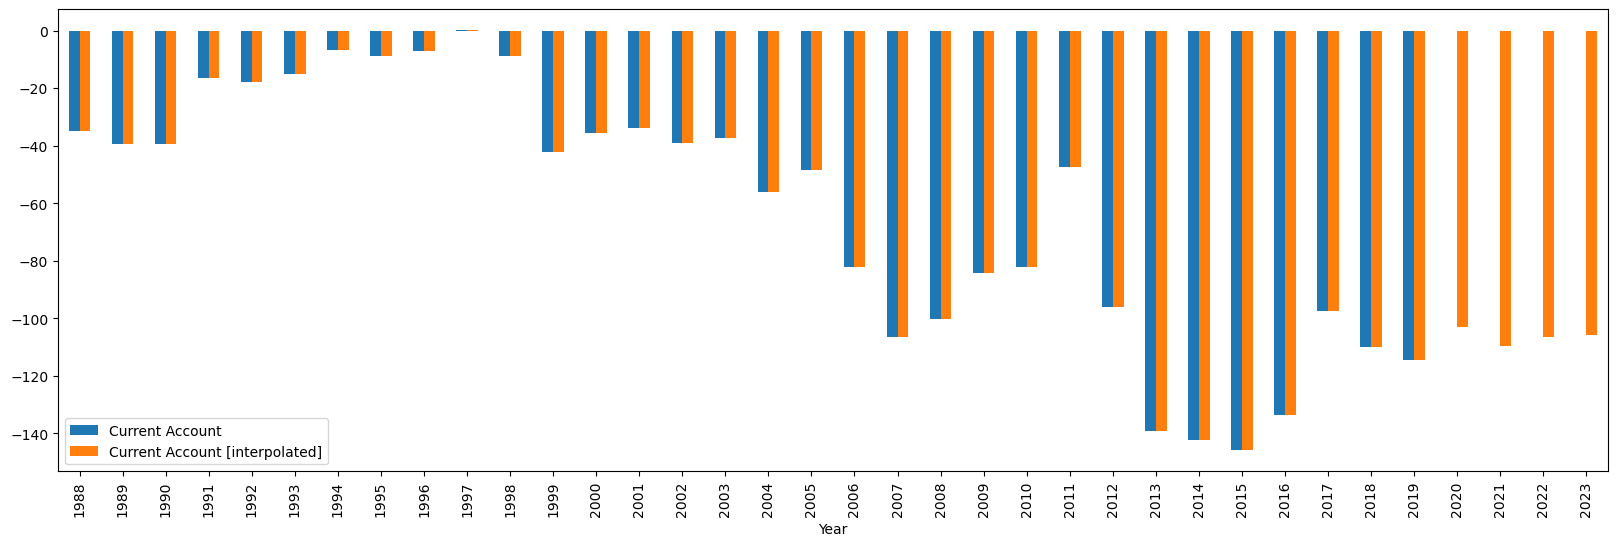

In [275]:
#Указать показатель, который хотим визулизировать
Indicator='Current Account'

# Указать страну
country = 'UK'
# Указать параметр(столбец)
column_interpolated = Indicator
column_manual = f'{Indicator} [interpolated]'
#
#df_output = pd.read_excel('./output.xlsx') # расскоментировать, если нужно из файла загрузить, иначе берется из ячейки выше
tmp = df_output[df_output['Coun
                          try'] == country]
tmp = tmp[['Year', column_interpolated, column_manual]] # не интерполирует минусовые значения
tmp.plot.bar(x='Year', figsize=(20, 6))

<AxesSubplot:xlabel='Year'>

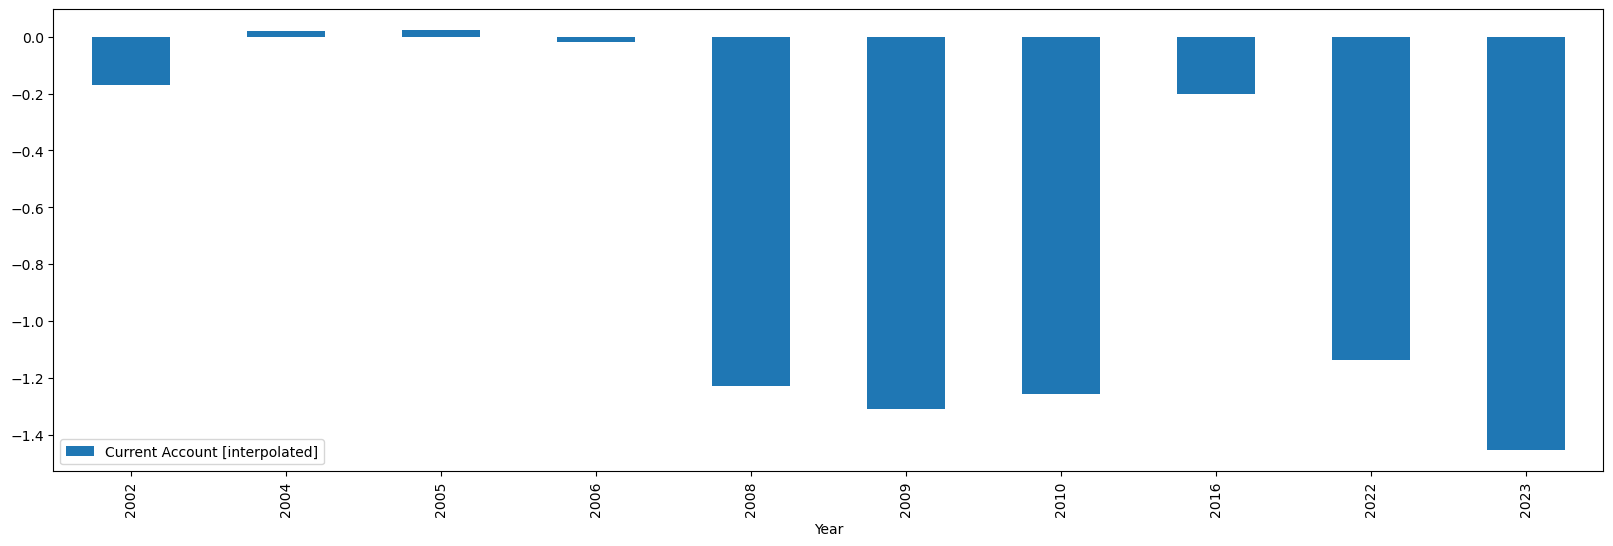

In [262]:
#Находим максимальные и минимальные (значения внутри quantile(x)) децили с двух сторон 
df = pd.read_excel('./output.xlsx')
df_outl1 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
   
    max_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.8)
    min_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.2)
    a=(df_temp[f'{Indicator} [interpolated]']>max_value)
    b=(df_temp[f'{Indicator} [interpolated]']<min_value)

    df_temp1=(df_temp[b|a][['Country', 'Year', f'{Indicator} [interpolated]']])
    
    df_outl1 = df_outl1.append(df_temp1)
country = 'Armenia'
tmp_outl1 = df_outl1[df_outl1['Country'] == country]
tmp_outl1 = tmp_outl1[['Year', f'{Indicator} [interpolated]']]
tmp_outl1.plot.bar(x='Year', figsize=(20, 6))

In [263]:
#Находим значения вне максимальных и минимальных децилей 
df = pd.read_excel('./output.xlsx')
df_outl2 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
   
    max_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.8)
    min_value=df_temp[f'{Indicator} [interpolated]'].quantile(0.2)
    c=((df_temp[f'{Indicator} [interpolated]']>min_value)&(df_temp[f'{Indicator} [interpolated]']<max_value))
    
    df_temp2=[df_temp[c][['Country', 'Year', f'{Indicator} [interpolated]']]]
    
    df_outl2 = df_outl2.append(df_temp2)

<AxesSubplot:xlabel='Year'>

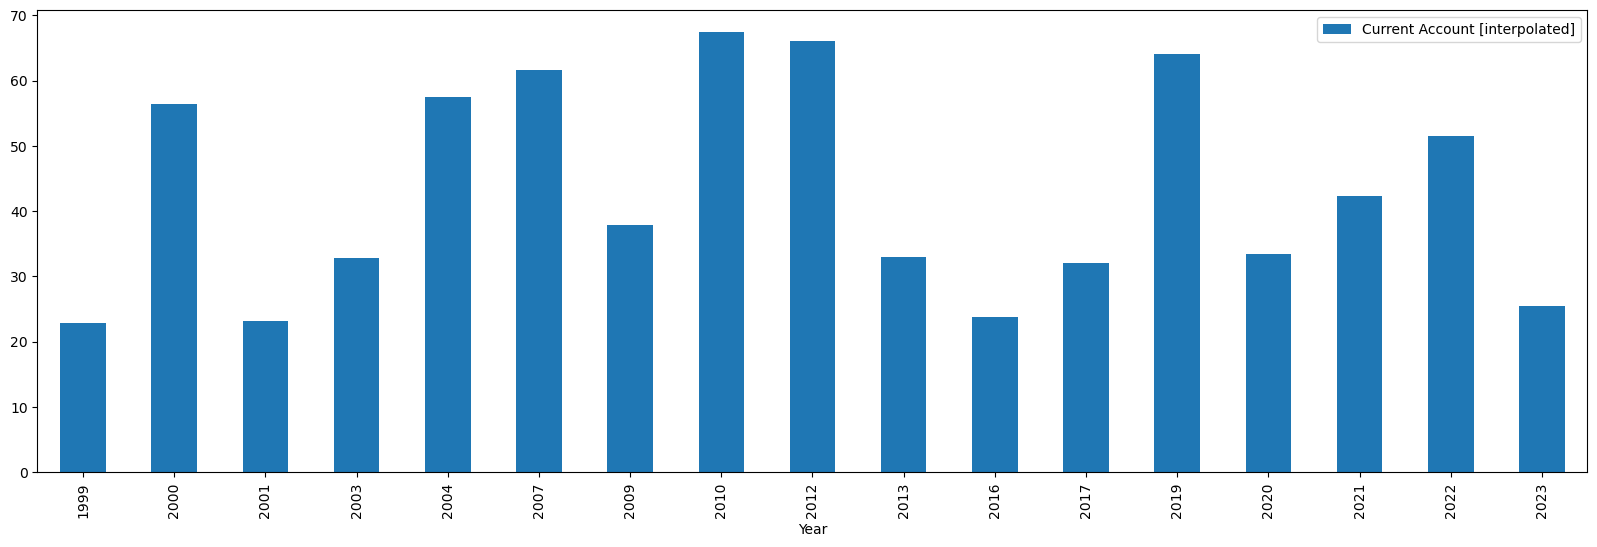

In [264]:
country = 'Russia'
tmp_outl2 = df_outl2[df_outl2['Country'] == country]
tmp_outl2 = tmp_outl2[['Year', f'{Indicator} [interpolated]']]
tmp_outl2.plot.bar(x='Year', figsize=(20, 6))

In [265]:
#Объединяем 2 массива выше
result = pd.merge(df_outl1, df_outl2, on= ['Year', 'Country'], suffixes=('_outliers', ''), how='outer')
result.fillna(0, inplace=True)
result.sort_values(by=['Country','Year'], inplace=True)
result.set_index('Year')
#print(result)

,Country,Current Account [interpolated]_outliers,Current Account [interpolated]
Year,,,
1988,Afghanistan,1.36e-04,0.00e+00
1990,Afghanistan,0.00e+00,1.78e-04
1991,Afghanistan,0.00e+00,1.70e-04
1992,Afghanistan,0.00e+00,1.72e-04
1993,Afghanistan,1.42e-04,0.00e+00
1994,Afghanistan,0.00e+00,7.28e-04
1995,Afghanistan,0.00e+00,2.44e-03
1996,Afghanistan,0.00e+00,5.45e-03
1997,Afghanistan,0.00e+00,1.70e-03


<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

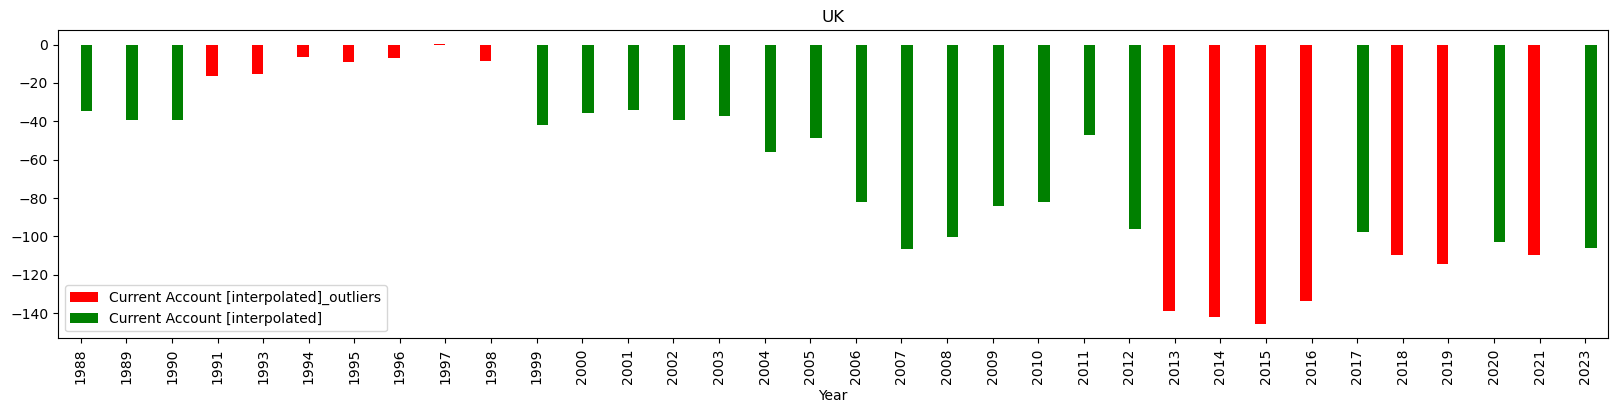

In [266]:
country = 'UK'
tmp_outl3 = result[result['Country'] == country]
tmp_outl3 = tmp_outl3[['Year', f'{Indicator} [interpolated]_outliers', f'{Indicator} [interpolated]']]
tmp_outl3.plot.bar(x='Year', figsize=(20, 4), title=country, color=["red", 'green'])

In [267]:
#Находим максимальный и минимальный дециль по разнице значений показателя
#Механизм тот же, что и выше
df = pd.read_excel('./output.xlsx')
df_outld1 = pd.DataFrame()

tail = 0.05

for i in df['Country'].unique():
    df_temp=df[df['Country'] == i]
    max_value=df_temp[f'{Indicator} [interpolated]'].diff(periods=1).quantile( 1 - tail )
    min_value=df_temp[f'{Indicator} [interpolated]'].diff(periods=1).quantile( tail )
    a=(df_temp[f'{Indicator} [interpolated]'].diff(periods=1)<min_value)
    b=(df_temp[f'{Indicator} [interpolated]'].diff(periods=1)>max_value)

    df_temp1=(df_temp[a|b][['Country', 'Year', f'{Indicator} [interpolated]']])
    
    df_outld1 = df_outld1.append(df_temp1)

df = pd.read_excel('./output.xlsx')
df_outld2 = pd.DataFrame()
for i in df['Country'].unique():
    df_temp2=df[df['Country'] == i]
   
    max_value=df_temp2[f'{Indicator} [interpolated]'].diff(periods=1).quantile( 1 - tail )
    min_value=df_temp2[f'{Indicator} [interpolated]'].diff(periods=1).quantile( tail )
    c=((df_temp2[f'{Indicator} [interpolated]'].diff(periods=1)>min_value)&(df_temp2[f'{Indicator} [interpolated]'].diff(periods=1)<max_value))

    df_temp3=[df_temp2[c][['Country', 'Year', f'{Indicator} [interpolated]']]]

    df_outld2 = df_outld2.append(df_temp3)
    
result_diff = pd.merge(df_outld1, df_outld2, on=['Year', 'Country'], suffixes=('_outliers', ''), how='outer')
result_diff.fillna(0, inplace=True)
result_diff.sort_values(by=['Country','Year'], inplace=True)

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

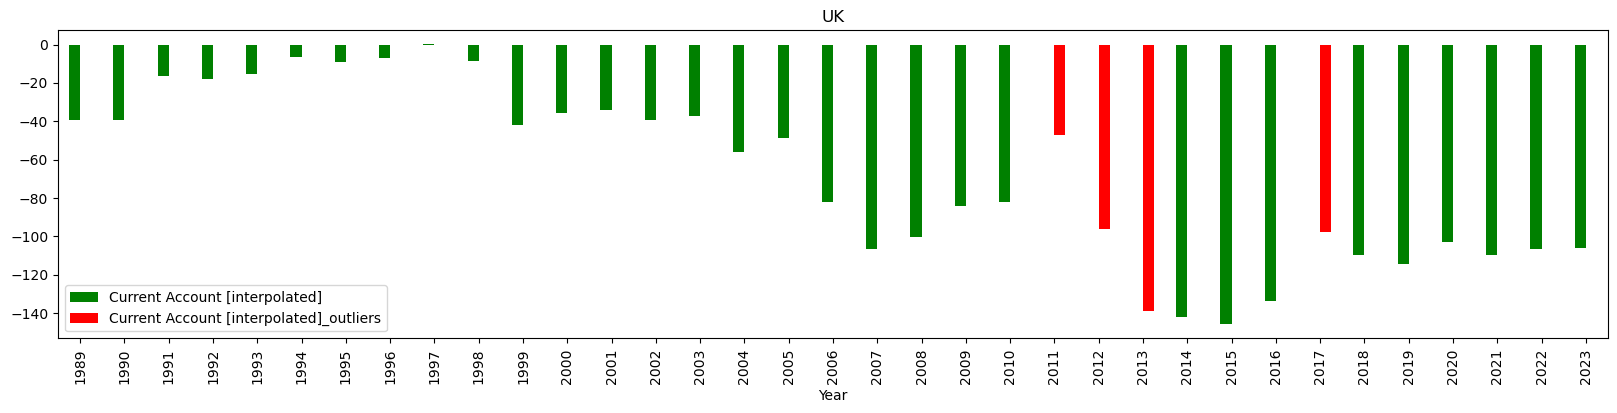

In [268]:
#Показываем на изначальном графике, где выбросы, посчитанные через разницу значений показателя 
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year', f'{Indicator} [interpolated]',f'{Indicator} [interpolated]_outliers']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['green', 'red'])

In [269]:
result_diff['Sum']=result_diff[f'{Indicator} [interpolated]']+result_diff[f'{Indicator} [interpolated]_outliers']
result_diff['Diff']=result_diff['Sum'].diff()
result_diff.fillna(0, inplace=True)
result_diff.reset_index(drop = True, inplace = True)
result_diff['cindex'] = result_diff.groupby(['Country']).cumcount()+1;
result_diff.loc[result_diff.cindex == 1, 'Diff'] = 0;

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

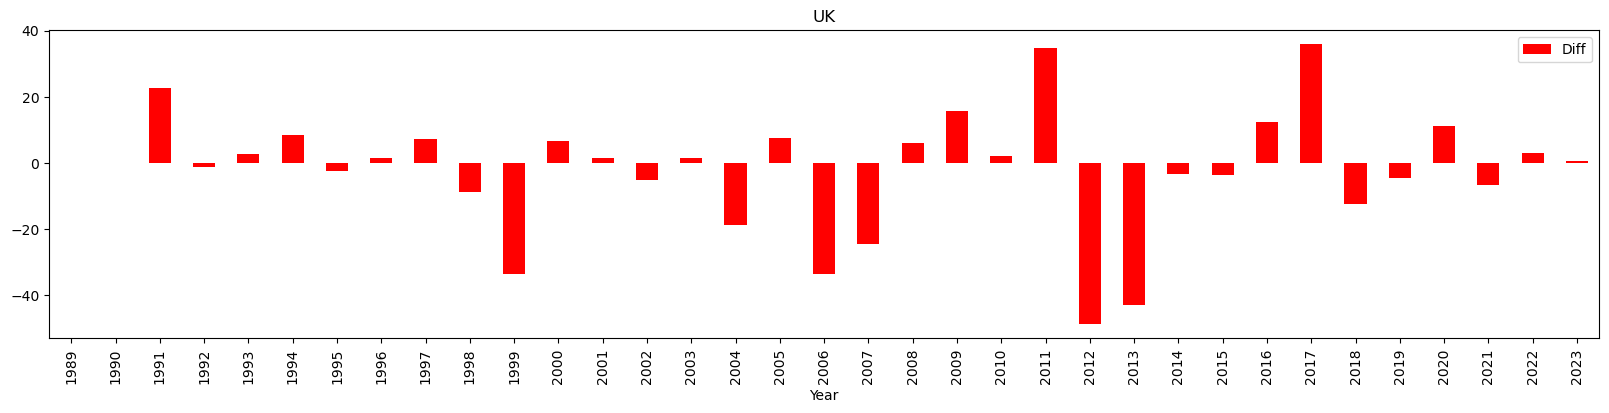

In [270]:
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year','Diff']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['red', 'green'])
#print(tmp_outl_difff)

In [271]:
#Создаем новый столбец с темпом роста
result_diff['Pace']=result_diff['Sum'].pct_change()
result_diff.fillna(0, inplace=True)
result_diff.loc[result_diff.cindex == 1, 'Pace'] = 0;

<AxesSubplot:title={'center':'UK'}, xlabel='Year'>

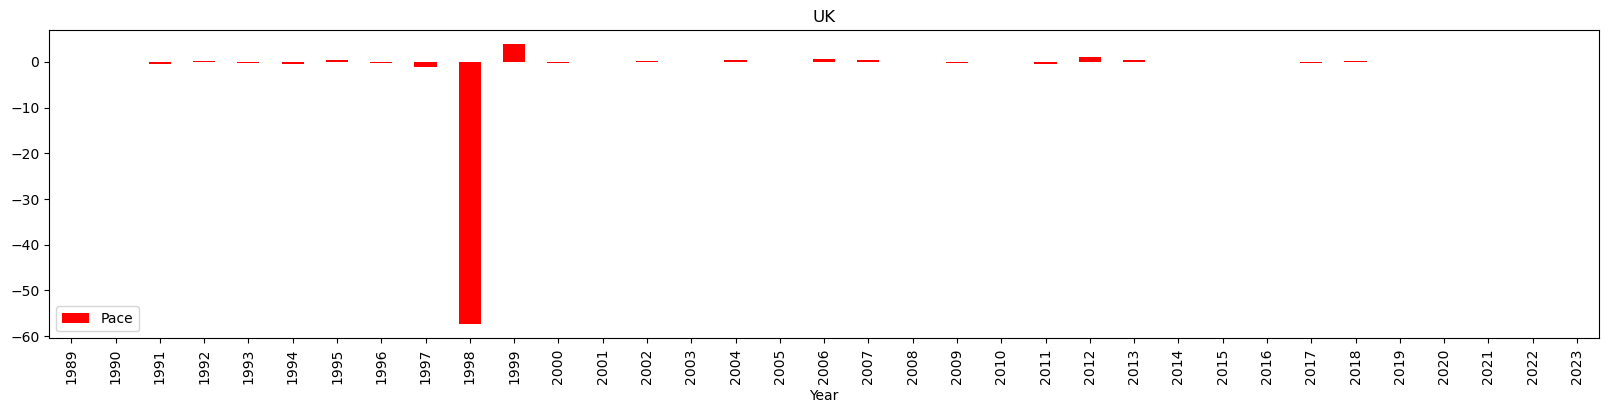

In [272]:
country = 'UK'
tmp_outl_difff = result_diff[result_diff['Country'] == country]
tmp_outl_difff = tmp_outl_difff[['Year','Pace']]
tmp_outl_difff.plot.bar(x='Year', figsize=(20, 4), title=country, color=['red', 'grey'])

In [273]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.precision", 2)

tmp_res_diff=result_diff.drop([f'{Indicator} [interpolated]_outliers', f'{Indicator} [interpolated]', 'cindex', 'Sum','Diff'], axis=1)
tmp_res_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
tmp_res_diff = tmp_res_diff[tmp_res_diff['Pace'].notna()]
tmp_res_diff=tmp_res_diff.loc[(result_diff['Pace'] < -0.5)|(result_diff['Pace'] > 0.5)|(result_diff['Pace'] == 0)]
#tmp_res_diff['Pace'] = pd.qcut(q)
#tmp_res_diff.astype({'Pace': 'int32'}).dtypes
#tmp_res_diff['Pace'] = tmp_res_diff['Pace'].astype(int)
print(tmp_res_diff)

                               Country  Year      Pace
0                          Afghanistan  1989  0.00e+00
5                          Afghanistan  1994  4.13e+00
6                          Afghanistan  1995  2.34e+00
7                          Afghanistan  1996  1.24e+00
8                          Afghanistan  1997 -6.88e-01
9                          Afghanistan  1998 -2.59e+00
10                         Afghanistan  1999 -1.59e+01
12                         Afghanistan  2001 -1.04e+00
13                         Afghanistan  2002 -2.69e+01
14                         Afghanistan  2003 -2.70e+00
15                         Afghanistan  2004  7.87e-01
16                         Afghanistan  2005 -3.79e+00
18                         Afghanistan  2007  6.82e-01
21                         Afghanistan  2010  1.03e+00
23                         Afghanistan  2012 -8.35e-01
24                         Afghanistan  2013  1.07e+01
26                         Afghanistan  2015 -1.16e+00
27        

In [274]:
len(tmp_res_diff.index)

2028